In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d
import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd

In [3]:
# Load the Excel file
excel_path = "Blum_2018_Bengal_Fan.xlsx"  # Replace with the actual path to your file
data = pd.read_excel(excel_path)

# Default values for bandwidth and smooth factor
default_bandwidth = 0.008
default_smooth_factor = 4

# Initialize the param_dict
param_dict = {}

# Process each column to construct the dictionary with column name and valid data count
for column in data.columns:
    # Count the number of non-NaN values in the column
    valid_data_count = data[column].count()
    # Construct the key with column name and valid data count
    key = f"{column} (n={valid_data_count})"
    # Assign the column data to the dictionary, excluding NaN values, along with default parameters
    param_dict[key] = [data[column].dropna().values, default_bandwidth, default_smooth_factor]

# Print or use the resulting dictionary
print(param_dict.keys())

dict_keys(['U1451A_4H-6H (n=273)', 'U1450A_6F-8F (n=263)', 'U1452B_8F (n=273)'])


# Interactive Bar to figure out the combination of KDE and Smoothing Factor

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d
from ipywidgets import interact, widgets

def plot_kde(data_sample, bandwidth=0.008, sigma=4):
    # Generate KDE
    kde = gaussian_kde(data_sample, bw_method=bandwidth)
    x_values = np.linspace(0, 3500, 1000)
    y_values = kde(x_values)
    
    # Apply smoothing filter
    y_smooth = gaussian_filter1d(y_values, sigma=sigma)
    
    # Plotting
    plt.figure(figsize=(10, 1.8))
    plt.plot(x_values, y_smooth, color='black', linewidth=1)
    plt.xlabel("Age (Ma)")
    plt.ylabel("Normalized KDE")
    
    # Set x-axis limits and major ticks
    plt.xlim(0, 3500)
    plt.xticks(np.arange(0, 3501, 500))  # Major ticks every 500
    
    # Add minor ticks every 100
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(100))
    
    # Customize minor tick appearance
    plt.tick_params(axis='x', which='minor', length=4, color='black')
    
    # Remove y-axis ticks
    plt.gca().yaxis.set_ticks([])
    plt.gca().yaxis.set_ticklabels([])

    plt.show()

# Create interactive sliders for bandwidth and sigma, and add data_sample as a fixed argument
def interactive_plot(data_sample):
    interact(
        lambda bandwidth, sigma: plot_kde(data_sample, bandwidth=bandwidth, sigma=sigma),
        bandwidth=widgets.FloatSlider(value=0.008, min=0.005, max=0.5, step=0.001, 
                                      description='Bandwidth', readout_format='.3f'),
        sigma=widgets.FloatSlider(value=3, min=0, max=10, step=0.5, description='Smooth Sigma')
    )

In [5]:
# Example usage with a dataset
# Replace data_sample below with your actual data when calling interactive_plot(data_sample)
interactive_plot(param_dict['U1451A_4H-6H (n=273)'][0])

interactive(children=(FloatSlider(value=0.008, description='Bandwidth', max=0.5, min=0.005, readout_format='.3…

# Demo with set Bandwidth and smoothing parameter

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d

def plot_kde_with_params(data, bandwidth, smooth_factor):
    """
    Plots a KDE with specified bandwidth and smoothing factor.
    
    Parameters:
    - data: array-like, the data to plot.
    - bandwidth: float, the bandwidth for the KDE.
    - smooth_factor: float, the sigma for Gaussian smoothing applied to the KDE values.
    """

    # Generate KDE
    kde = gaussian_kde(data, bw_method=bandwidth)
    x_values = np.linspace(0, 3500, 1000)
    y_values = kde(x_values)
    
    # Apply smoothing filter
    y_smooth = gaussian_filter1d(y_values, sigma=smooth_factor)
    
    # Plotting
    plt.figure(figsize=(12, 1.5))
    plt.plot(x_values, y_smooth, color='black', linewidth=1)
    plt.xlabel("Age (Ma)")
    plt.ylabel("Normalized KDE")
    
    # Set x-axis limits and major ticks
    plt.xlim(0, 3500)
    plt.xticks(np.arange(0, 3501, 500))  # Major ticks every 500
    
    # Add minor ticks every 100
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(100))
    
    # Customize minor tick appearance
    plt.tick_params(axis='x', which='minor', length=4, color='black')
    
    # Remove y-axis ticks
    plt.gca().yaxis.set_ticks([])
    plt.gca().yaxis.set_ticklabels([])

    plt.show()


In [16]:
plot_kde_with_params(param_dict['U1451A_4H-6H (n=273)'], bandwidth=0.02, smooth_factor=2)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

# Stacking

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d

# Stacked Graph with Color Blocks

`plt.text()`: change the position of the sample names in the stacked graph

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d

color_blocks = [
    (0, 300, (173/255, 217/255, 152/255)),   # Greenish block (A)
    (400, 600, (140/255, 200/255, 225/255)), # Light Blue block (B)
    (700, 900, (158/255, 185/255, 225/255)), # Blue block (C)
    (910, 1250, (245/255, 220/255, 200/255)), # Adjusted Light Orange block (D)
    (1300, 1700, (255/255, 205/255, 185/255)), # Adjusted Light Pink block (E)
    (1710, 2100, (245/255, 190/255, 150/255)), # Orange block (F)
    (2300, 2750, (235/255, 140/255, 135/255))  # Red block (G)
]


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d

def plot_stacked_kdes(params, offset, color_blocks=None):
    # Create figure
    plt.figure(figsize=(12, 5))

    # Add color blocks if provided
    if color_blocks is not None:
        for start, end, color in color_blocks:
            plt.axvspan(start, end, color=color, alpha=0.6)  # Alpha for transparency

    # Loop through each dataset and plot
    for idx, (label, (data, bandwidth, smooth_factor)) in enumerate(params.items()):
        # Clean data by removing NaNs and infinities
        data = data[~np.isnan(data)]
        data = data[np.isfinite(data)]

        # Generate KDE
        kde = gaussian_kde(data, bw_method=bandwidth)
        x_values = np.linspace(0, 3500, 1000)  # x-axis range and resolution
        y_values = kde(x_values)

        # Apply smoothing filter
        y_smooth = gaussian_filter1d(y_values, sigma=smooth_factor)

        # Normalize each curve to have a maximum height of 1
        y_smooth = y_smooth / max(y_smooth)

        # Offset the y-values to separate curves
        y_offset = y_smooth + idx * offset

        # Plot the smoothed KDE with black color and line width of 1
        plt.plot(x_values, y_offset, color='black', linewidth=1)

        # Add text label aligned to the right end of the plot, slightly above the curve
        plt.text(3500, y_offset[-1] + 0.2 * offset, label, 
                 ha='right', va='center', fontsize=10)

    # Customize the x-axis
    plt.xlim(0, 3500)
    plt.xlabel("Age (Ma)", fontsize=12)
    
    # Add major ticks every 500 and minor ticks every 100 on the x-axis
    plt.xticks(np.arange(0, 3501, 500))  # Major ticks every 500
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(100))

    # Thicken x-axis spine and customize x-axis tick appearance
    plt.gca().spines['bottom'].set_linewidth(1.5)  # Thicker x-axis spine
    plt.gca().tick_params(axis='x', width=1.5, labelsize=10)  # Thicker x-axis major ticks and labels
    plt.tick_params(axis='x', which='minor', length=4, color='black', width=1.5)  # Thicker minor ticks

    # Remove y-axis ticks and labels for a clean stacked look
    plt.gca().yaxis.set_ticks([])
    plt.gca().yaxis.set_ticklabels([])

    # Remove only the top and right spines, keep the bottom (x-axis) spine
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.show()


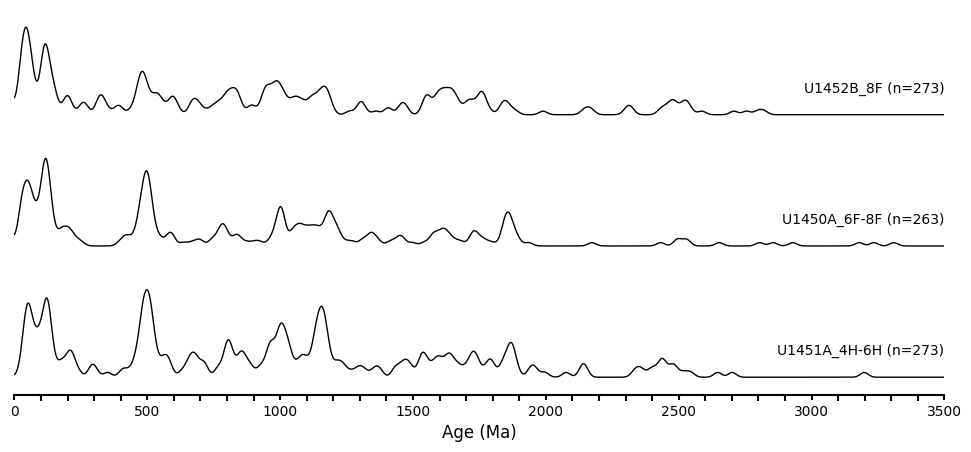

In [20]:
plot_stacked_kdes(params=param_dict, offset=1.5, color_blocks=None)

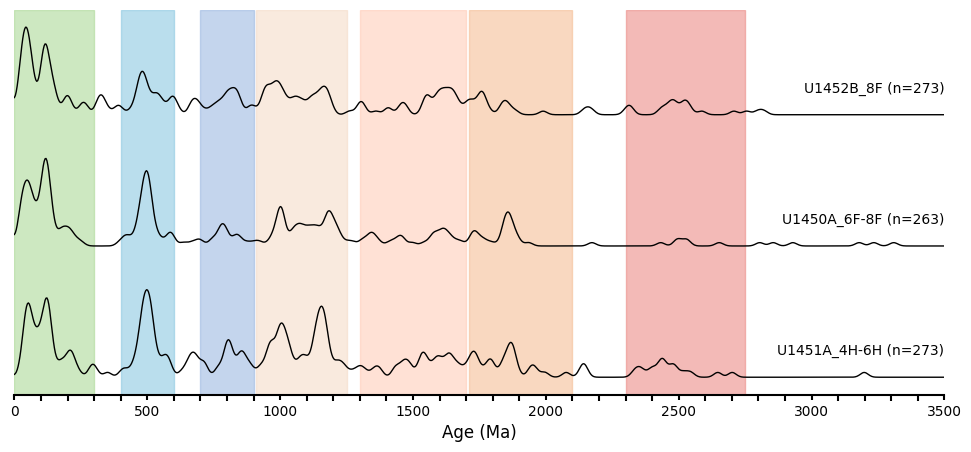

In [21]:
plot_stacked_kdes(params=param_dict, offset=1.5, color_blocks=color_blocks)

In [49]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import gaussian_kde
# from scipy.ndimage import gaussian_filter1d

# def plot_stacked_kdes(params, offset, color_blocks):
#     # Create figure
#     plt.figure(figsize=(12, 5))

#     # Add color blocks with specified alpha for transparency
#     for start, end, color in color_blocks:
#         plt.axvspan(start, end, color=color, alpha=0.6)

#     # Loop through each dataset and plot
#     for idx, (label, (data, bandwidth, smooth_factor)) in enumerate(params.items()):
#         # Clean data by removing NaNs and infinities
#         data = data[~np.isnan(data)]
#         data = data[np.isfinite(data)]

#         # Generate KDE
#         kde = gaussian_kde(data, bw_method=bandwidth)
#         x_values = np.linspace(0, 3500, 1000)  # x-axis range and resolution
#         y_values = kde(x_values)

#         # Apply smoothing filter
#         y_smooth = gaussian_filter1d(y_values, sigma=smooth_factor)

#         # Normalize each curve to have a maximum height of 1
#         y_smooth = y_smooth / max(y_smooth)

#         # Offset the y-values to separate curves
#         y_offset = y_smooth + idx * offset

#         # Plot the smoothed KDE with black color and line width of 1
#         plt.plot(x_values, y_offset, color='black', linewidth=1)

#         # Add text label aligned to the right end of the plot, slightly above the curve
#         plt.text(3500, y_offset[-1] + 0.2 * offset, label, 
#                  ha='right', va='center', fontsize=10)

#     # Customize the x-axis
#     plt.xlim(0, 3500)
#     plt.xlabel("Age (Ma)", fontsize=12)
    
#     # Add major ticks every 500 and minor ticks every 100 on the x-axis
#     plt.xticks(np.arange(0, 3501, 500))  # Major ticks every 500
#     plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(100))

#     # Thicken x-axis spine and customize x-axis tick appearance
#     plt.gca().spines['bottom'].set_linewidth(1.5)  # Thicker x-axis spine
#     plt.gca().tick_params(axis='x', width=1.5, labelsize=10)  # Thicker x-axis major ticks and labels
#     plt.tick_params(axis='x', which='minor', length=4, color='black', width=1.5)  # Thicker minor ticks

#     # Remove y-axis ticks and labels for a clean stacked look
#     plt.gca().yaxis.set_ticks([])
#     plt.gca().yaxis.set_ticklabels([])

#     # Remove only the top and right spines, keep the bottom (x-axis) spine
#     plt.gca().spines['top'].set_visible(False)
#     plt.gca().spines['right'].set_visible(False)
#     plt.gca().spines['left'].set_visible(False)

#     plt.show()


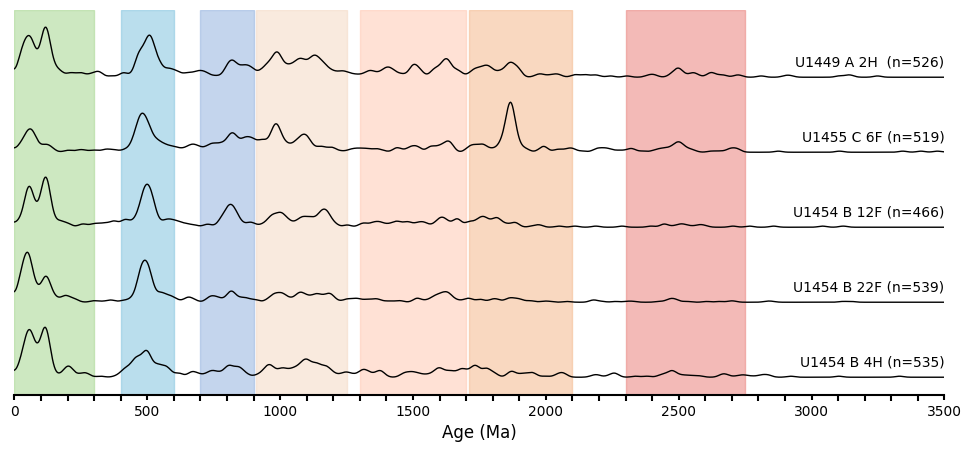

In [50]:
# Call the function with the test parameters
plot_stacked_kdes(params=param_dict, offset=1.5, color_blocks=color_blocks)